In [ ]:
import pandas as pd
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt
from vzu import visualise
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Loading of the data

In [3]:
df_HPC = pd.read_csv('data/HPC1.csv', names = ['HPC'])
df_PFC = pd.read_csv('data/PFC1.csv', names = ['PFC'])
df_EMG = pd.read_csv('data/EMG1.csv', names = ['EMG'])

df = pd.concat([df_HPC, df_PFC,df_EMG], axis=1)
df.head()

,HPC,PFC,EMG
0,-5.836571,9.003894,0.506779
1,59.422057,77.620067,0.506780
2,-42.925064,-45.459779,0.506785
3,49.265049,115.321417,0.506792
4,70.679527,80.468220,0.506802


In [4]:
df_test = df[:2500]

## Transformation of the data with TSNE

In [6]:
X = StandardScaler().fit_transform(df_test)

In [13]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape

(2500, 2)

In [ ]:
# 1. On définit le nombre de clusters (par exemple 3 ou 4)
n_clusters = 6 # use of the silouhette to chose this number 

# 2. On applique K-Means sur vos données réduites (X_embedded) ou initiales (X)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_embedded)

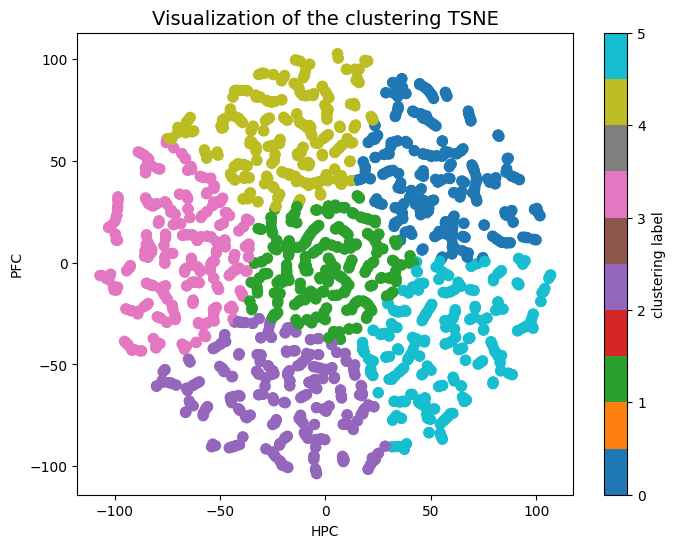

In [17]:
visualise(X_embedded,labels,'TSNE')